<a href="https://colab.research.google.com/github/Bigdata92/190902AdvancedVisualPerception/blob/master/Flicker_application_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install flickrapi

In [19]:
from flickrapi import FlickrAPI

FLICKER_KEY = '505e8c2b05e8b5aa51766a43fc4bc7a7' #선생님 FLICKER KEY
FLICKER_SECRET = '46b3ef2f43b04ac6'

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras='url_s' # 추출할거 옵션
# extras='url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

monkeys = flickr.photos.search(text='monkey', per_page=5, extras=extras) #5장 받아오겠다

photos = monkeys['photos']

from pprint import pprint #pretty print : hierarchy 파악하기 쉽게 줄맞춰서 나옴 
pprint(photos)




{u'page': 1,
 u'pages': 208727,
 u'perpage': 5,
 u'photo': [{u'farm': 66,
             u'height_s': u'160',
             u'id': u'48748524507',
             u'isfamily': 0,
             u'isfriend': 0,
             u'ispublic': 1,
             u'owner': u'184490489@N08',
             u'secret': u'a848000923',
             u'server': u'65535',
             u'title': u'Snow Monkeys',
             u'url_s': u'https://live.staticflickr.com/65535/48748524507_a848000923_m.jpg',
             u'width_s': u'240'},
            {u'farm': 66,
             u'height_s': u'160',
             u'id': u'48748342196',
             u'isfamily': 0,
             u'isfriend': 0,
             u'ispublic': 1,
             u'owner': u'184490489@N08',
             u'secret': u'd0715409db',
             u'server': u'65535',
             u'title': u'Cheeky Monkey',
             u'url_s': u'https://live.staticflickr.com/65535/48748342196_d0715409db_m.jpg',
             u'width_s': u'240'},
            {u'farm': 66,

In [44]:
photos1 = monkeys['photos']['photo'][0]['url_s']
photos1



u'https://live.staticflickr.com/65535/48748524507_a848000923_m.jpg'

In [0]:
# import the necessary packages
import numpy as np
import urllib
import cv2

def url_to_image(url):
  resp = urllib.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  
  return image


downloading https://live.staticflickr.com/65535/48748524507_a848000923_m.jpg


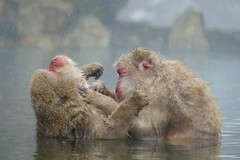

downloading https://live.staticflickr.com/65535/48747825766_e6caab05b6_m.jpg


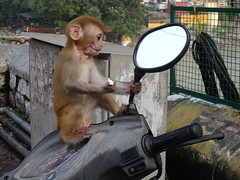

In [24]:
from google.colab.patches import cv2_imshow

# initialize the list of image URLs to download
urls = [
	"https://live.staticflickr.com/65535/48748524507_a848000923_m.jpg",
    "https://live.staticflickr.com/65535/48747825766_e6caab05b6_m.jpg"
]
for url in urls:
  
  print "downloading %s" % (url)
  image = url_to_image(url)
  cv2_imshow(image)
 



In [12]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


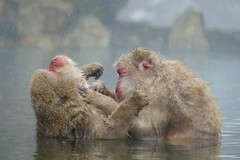

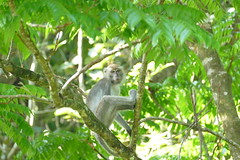

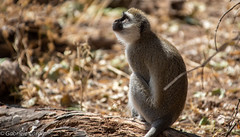

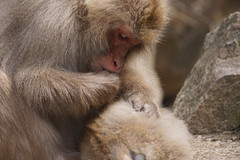

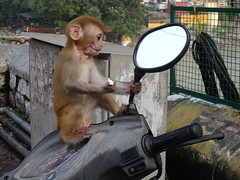

In [51]:
from google.colab.patches import cv2_imshow

for i in range(5):
  image_original_url = photos['photo'][i]['url_s']
  image_temp = url_to_image(image_original_url)
  file_name = '/content/gdrive/My Drive/datasets/monkeys_{}.jpg'.format(i)
  cv2.imwrite(file_name, image_temp)
  cv2_imshow(image_temp)
# initialize the list of image URLs to download

downloading https://live.staticflickr.com/65535/48747977493_e65decccd7_m.jpg


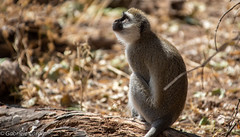

In [52]:
urls = [
    "https://live.staticflickr.com/65535/48747977493_e65decccd7_m.jpg"
]

# loop over the image URLs 
for url in urls:
  # download the image URL and display it
  print "downloading %s" % (url)
  image = url_to_image(url)
  cv2_imshow(image)

In [53]:
print image_temp.shape

(180, 240, 3)


In [0]:
def image_resize(image, x, y):
  return cv2.resize(image, (x, y))

In [0]:
resized = image_resize(image_temp, 224, 224)

(224, 224, 3)


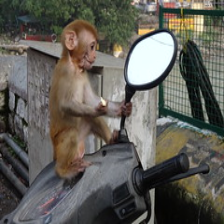

In [58]:
print resized.shape
cv2_imshow(resized)

In [0]:
resized = np.expand_dims(resized, axis=0)

In [60]:
print resized.shape

(1, 224, 224, 3)


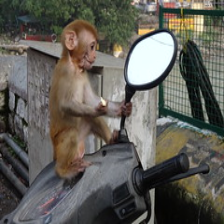

In [61]:
cv2_imshow(np.squeeze(resized))